In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.linear_model import LinearRegression
df=pd.read_csv('.\Downloads\Train.csv')
print(df)

      feature_1  feature_2  feature_3  feature_4  feature_5      target
0      0.293416  -0.945599  -0.421105   0.406816   0.525662  -82.154667
1     -0.836084  -0.189228  -0.776403  -1.053831   0.597997  -48.897960
2      0.236425   0.132836  -0.147723   0.699854  -0.187364   77.270371
3      0.175312   0.143194  -0.581111  -0.122107  -1.292168   -2.988581
4     -1.693011   0.542712  -2.798729  -0.686723   1.244077  -37.596722
...         ...        ...        ...        ...        ...         ...
1595  -0.274961  -0.820634  -0.757173  -0.147555  -0.307149  -80.110012
1596  -0.076099   0.255257   0.290054   1.796036   0.340350  118.315601
1597   1.044177  -0.899206   1.730399  -1.871057   0.442520 -107.510508
1598  -1.269173  -0.005052   1.857669  -1.080365   0.736334  -47.341558
1599  -1.884000  -0.849427  -1.452270   0.488613   1.459576 -115.939003

[1600 rows x 6 columns]


In [11]:
model=LinearRegression()

In [12]:
x=pd.DataFrame(np.c_[df['feature_1'], df['feature_2'], df['feature_3'],  df['feature_4'], df['feature_5']], columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])
y = df['target']


In [13]:
model.fit(x,y)
coeff=model.coef_
coeff

array([29.68187118, 92.66247759,  8.28062089, 44.76773522,  2.51916121])

In [14]:
bias=model.intercept_
bias

4.990966735574963

In [15]:
model.score(x,y)

0.9660939669975617

# without using sklearn

In [41]:
df=pd.read_csv('.\Downloads\Train.csv')
x1=df['feature_1'].values
x2=df['feature_2'].values
x3=df['feature_3'].values
x4=df['feature_4'].values
x5=df['feature_5'].values
x6=np.ones((x5.shape[0],)).T
x=np.vstack((x1,x2,x3,x4,x5,x6))
print(x.shape)
print(x)
y=df['target'].values
y.reshape((-1,))
print(y.shape)

(6, 1600)
[[ 0.29341624 -0.83608408  0.23642511 ...  1.04417694 -1.2691729
  -1.88400025]
 [-0.94559871 -0.18922804  0.13283602 ... -0.89920649 -0.00505216
  -0.84942743]
 [-0.42110515 -0.77640262 -0.14772298 ...  1.73039905  1.85766873
  -1.45227035]
 [ 0.40681602 -1.05383124  0.69985396 ... -1.87105676 -1.08036482
   0.48861308]
 [ 0.52566183  0.59799685 -0.18736416 ...  0.44251965  0.73633394
   1.4595758 ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
(1600,)


In [53]:
def hypothesis(x,theta):
    return np.dot(theta,x)

In [54]:
def error(x,y,theta):
    e=0
    for i in range(x.shape[1]):
        X=x[:,i]
        e+=(hypothesis(X,theta)-y[i])**2
    return e/(x.shape[1]*2)

In [55]:
def grad(x,y,theta):
    g=np.zeros(x.shape[0])
    for i in range(x.shape[1]):
        X=x[:,i]
        for j in range(6):
            g[j]+=(hypothesis(X,theta)-y[i])*x[j][i]
    for i in range(6):
        g[i]/=x.shape[1]
    return g

In [56]:
def grad_ascent(x,y,learning_rate=0.01):
    err=[]
    theta_list=[]
    theta=np.zeros((6,))
    for i in range(1000):
        e=error(x,y,theta)
        g=grad(x,y,theta)
        for j in range(6):
            theta[j]-=learning_rate*g[j]
        err.append(e)
        theta_list.append(theta)
    return err,theta_list,theta

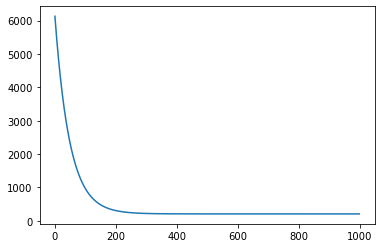

In [57]:
e,t,final=grad_ascent(x,y)
plt.plot(e)
plt.show()

In [52]:
print(final)

[29.67987527 92.65908015  8.27756078 44.76510038  2.51769725  4.98825521]
